In [1]:
import torch
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(font_scale=2., rc={"lines.linewidth": 4.5})

sns.set_style("whitegrid")
# sns.set_palette("Paired")

In [3]:
palette = sns.color_palette("Paired")

In [4]:
new_palette = palette
new_palette[0] = palette[8]
new_palette[1] = palette[9]
new_palette[8] = palette[0]
new_palette[9] = palette[1]

sns.set_palette(new_palette)

In [5]:
all_outs = glob.glob("../models/gpytorch/results_adam/*.pt")

In [6]:
all_out_as_list = []
for res in all_outs:
    reslist = torch.load(res)
    [all_out_as_list.append(r) for r in reslist]

In [7]:
results = pd.DataFrame(all_out_as_list)

In [8]:
results["root_decomp"].unique()

array([1.0e+01, 1.0e+02, 2.5e+02, 5.0e+02, 1.0e+03, 2.0e+03, 5.0e+03,
       1.0e+04, 1.0e+10])

In [9]:
results[
    (results["precond_size"] == 100) & (results["cg_tolerance"] == 0.001) & (results["root_decomp"]==10000)
].groupby(["dataset"]).mean()

,test_loglik,test_loglik_unnormalized,test_mae,test_mae_unnormalized,test_rmse,test_rmse_unnormalized,root_decomp,is_cholesky,cg_tolerance,precond_size,device,with_adam,split,seed
dataset,,,,,,,,,,,,,,
wilson_bike,0.419396,0.023243,0.060794,0.090346,0.130358,0.193725,10000.0,False,0.001,100.0,0.375000,True,1.625000,0.0
wilson_elevators,-3.224109,-1.848063,0.272827,0.068909,0.360757,0.091118,10000.0,False,0.001,100.0,2.285714,True,1.571429,0.0
wilson_pol,0.669109,-3.061978,0.066270,2.765086,0.118902,4.961110,10000.0,False,0.001,100.0,4.444444,True,1.777778,0.0
wilson_protein,-0.723258,-0.465788,0.315020,0.243512,0.494643,0.382361,10000.0,False,0.001,100.0,6.166667,True,1.666667,0.0


In [10]:
results[
    (results["is_cholesky"] == True)
].groupby(["dataset"]).mean()

,test_loglik,test_loglik_unnormalized,test_mae,test_mae_unnormalized,test_rmse,test_rmse_unnormalized,root_decomp,is_cholesky,cg_tolerance,precond_size,device,with_adam,split,seed
dataset,,,,,,,,,,,,,,
wilson_bike,0.421580,0.025428,0.059675,0.088682,0.128578,0.191079,1.000000e+10,True,1.0,15.0,0.0,True,1.111111,0.0
wilson_elevators,-3.364965,-1.988920,0.273716,0.069134,0.359989,0.090924,1.000000e+10,True,1.0,15.0,2.0,True,1.111111,0.0
wilson_pol,0.674538,-3.056549,0.065269,2.723295,0.117964,4.921992,1.000000e+10,True,1.0,15.0,4.0,True,1.111111,0.0


In [11]:
results["dataset"].unique()

array(['wilson_elevators', 'wilson_protein', 'wilson_pol', 'wilson_bike',
       'wilson_skillcraft'], dtype=object)

In [12]:
results["root_decomp"].unique()

array([1.0e+01, 1.0e+02, 2.5e+02, 5.0e+02, 1.0e+03, 2.0e+03, 5.0e+03,
       1.0e+04, 1.0e+10])

In [13]:
def make_plots_by_root_decomp_size(
    ax, 
    dataset="wilson_pol", 
    yaxs="test_loglik",
    cg_tolerance=1, 
    precond_size=15, 
    show_legend=False):
    pol_results = results[
        (results["is_cholesky"] == False) & \
        (results["dataset"]==dataset) & (results["dtype"]=="double") & \
        (results["cg_tolerance"]==cg_tolerance) & (results["precond_size"]==precond_size)\
    ].groupby(
        ["root_decomp"]
    ).mean().reset_index()
    
    pol_results_float = results[
        (results["is_cholesky"] == False) & \
        (results["dataset"]==dataset) & (results["dtype"]=="float") & \
        (results["cg_tolerance"]==cg_tolerance) & (results["precond_size"]==precond_size)\
    ].groupby(
        ["root_decomp"]
    ).mean().reset_index()
    
    cholesky_float = results[(results["is_cholesky"]==True) & (results["dataset"]==dataset)].mean()
    
    ax.axhline(-cholesky_float[yaxs], color = "dimgray", label = "Cholesky")
    ax.plot(
        pol_results["root_decomp"], -pol_results[yaxs], label = "CG/LOVE, Double", marker=".",
        markersize=25
    )
    ax.plot(
        pol_results_float["root_decomp"], -pol_results_float[yaxs], label = "CG/LOVE, Float", marker=".",
        markersize=25
    )

    ax.set_xlabel("Root Decomposition Size")
    ax.set_ylabel("Test NLL")
    # plt.grid()
    if show_legend:
        ax.legend()
    # plt.ylim((-0.7, -0.5))


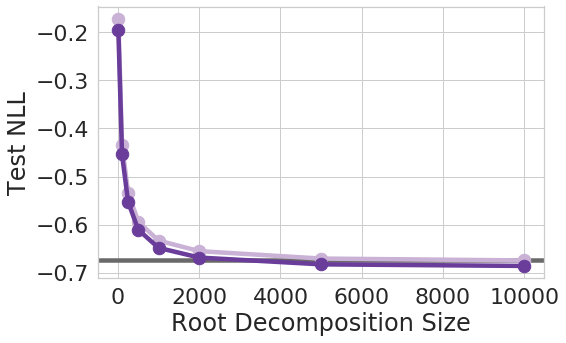

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
make_plots_by_root_decomp_size(ax)
#plt.ylim((-0.7, -0.6))

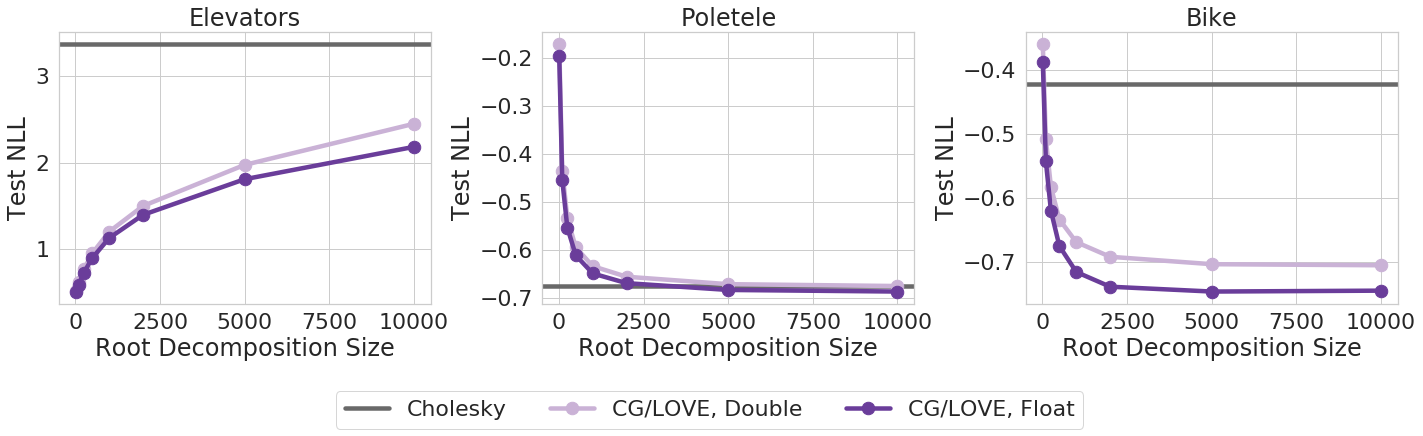

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5))
make_plots_by_root_decomp_size(ax[0], "wilson_elevators", show_legend=False)
make_plots_by_root_decomp_size(ax[1], "wilson_pol")
make_plots_by_root_decomp_size(ax[2], "wilson_bike")

ax[0].set_title("Elevators")
ax[1].set_title("Poletele")
ax[2].set_title("Bike")
plt.subplots_adjust(wspace=0.3)

# fig.suptitle("GPyTorch Defaults: CG Tol = 1.0, Preconditioner = 15", y=1.1)
ax[0].legend(ncol = 3, bbox_to_anchor = (1.75, -0.5), loc = "lower center")
# make_plots_by_root_decomp_size(ax[3], "wilson_protein")
#plt.tight_layout()

plt.savefig("NLL_defaults.pdf", bbox_inches="tight")

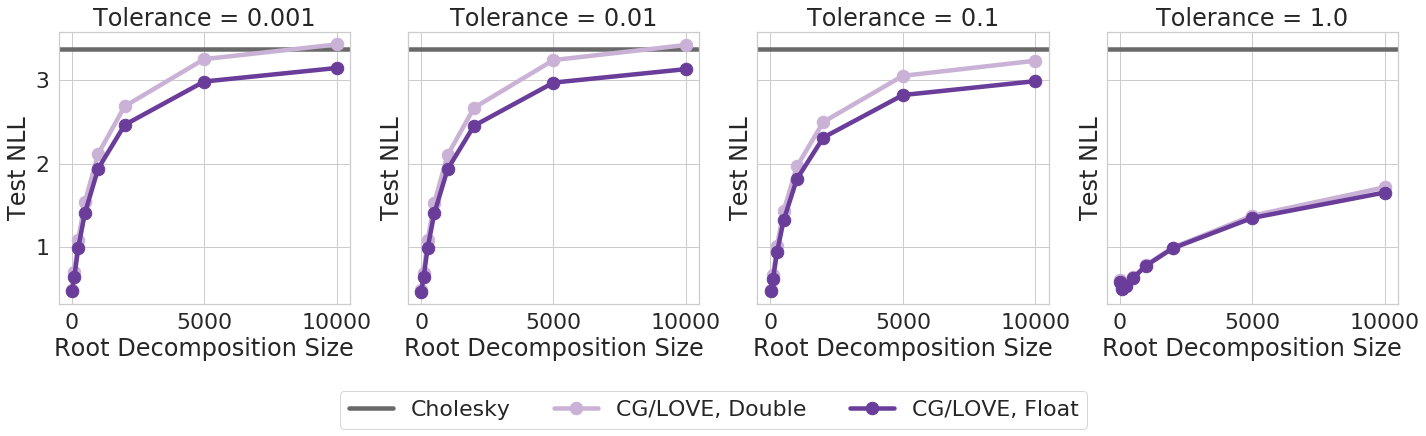

In [16]:
fig, ax = plt.subplots(1, 4, figsize = (24, 5), sharey=True)
make_plots_by_root_decomp_size(ax[0], "wilson_elevators", precond_size=100, cg_tolerance=0.001, show_legend=False)
make_plots_by_root_decomp_size(ax[1], "wilson_elevators", precond_size=100, cg_tolerance=0.01)
make_plots_by_root_decomp_size(ax[2], "wilson_elevators", precond_size=100, cg_tolerance=0.1)
make_plots_by_root_decomp_size(ax[3], "wilson_elevators", precond_size=100, cg_tolerance=1.0)

ax[0].set_title("Tolerance = 0.001")
ax[1].set_title("Tolerance = 0.01")
ax[2].set_title("Tolerance = 0.1")
ax[3].set_title("Tolerance = 1.0")

ax[0].legend(ncol = 3, bbox_to_anchor = (2.25, -0.5), loc = "lower center")

plt.savefig("NLL_elevators_precon_100.pdf", bbox_inches="tight")
# fig.suptitle("Elevators, Preconditioner = 50", y=1.1)
# plt.tight_layout()

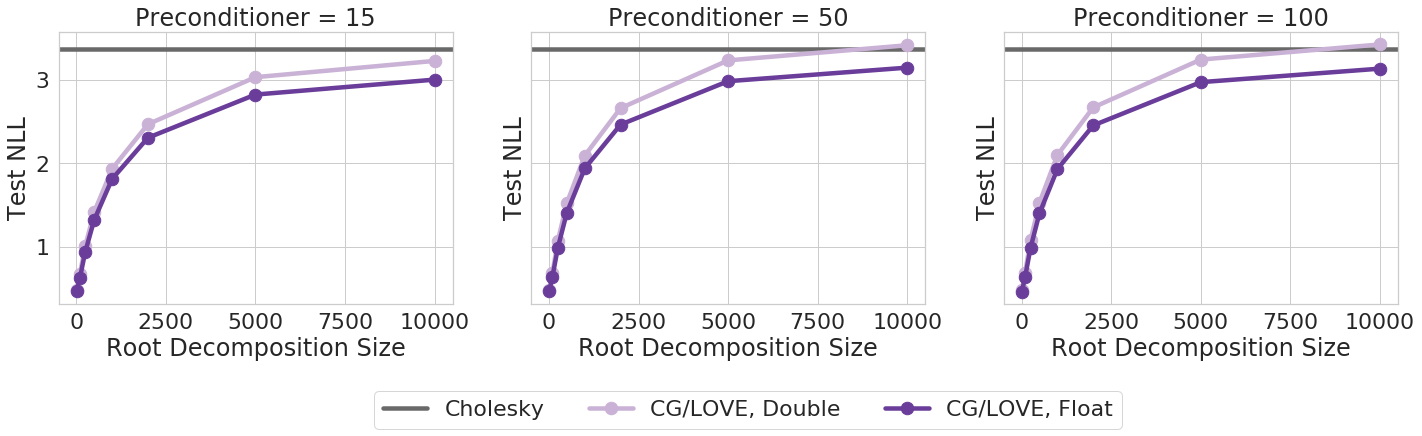

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5), sharey=True)
make_plots_by_root_decomp_size(ax[0], "wilson_elevators", precond_size=15, cg_tolerance=0.01, show_legend=True)
make_plots_by_root_decomp_size(ax[1], "wilson_elevators", precond_size=50, cg_tolerance=0.01)
make_plots_by_root_decomp_size(ax[2], "wilson_elevators", precond_size=100, cg_tolerance=0.01)

ax[0].set_title("Preconditioner = 15")
ax[1].set_title("Preconditioner = 50")
ax[2].set_title("Preconditioner = 100")

ax[0].legend(ncol = 3, bbox_to_anchor = (1.75, -0.5), loc = "lower center")
plt.savefig("NLL_elevators_tolerance_001.pdf", bbox_inches="tight")

# fig.suptitle("Elevators, CG Tolerance = 0.01", y=1.1)

Text(0.5, 1.1, 'Bike, CG Tolerance = 1.0')

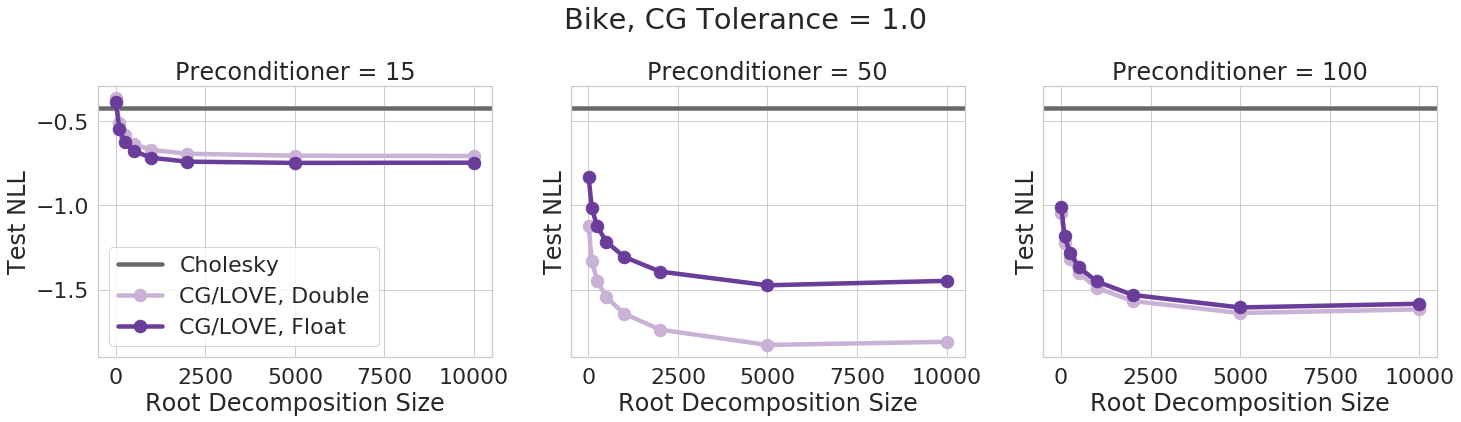

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5), sharey=True)
make_plots_by_root_decomp_size(ax[0], "wilson_bike", precond_size=15, cg_tolerance=1.0, show_legend=True)
make_plots_by_root_decomp_size(ax[1], "wilson_bike", precond_size=50, cg_tolerance=1.0)
make_plots_by_root_decomp_size(ax[2], "wilson_bike", precond_size=100, cg_tolerance=1.0)

ax[0].set_title("Preconditioner = 15")
ax[1].set_title("Preconditioner = 50")
ax[2].set_title("Preconditioner = 100")

fig.suptitle("Bike, CG Tolerance = 1.0", y=1.1)

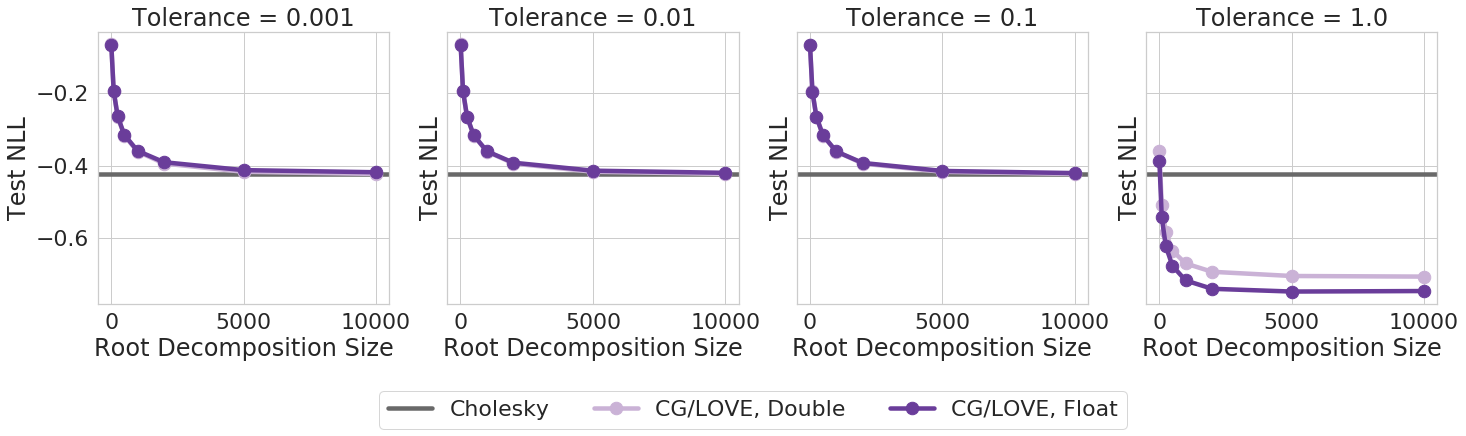

In [19]:
fig, ax = plt.subplots(1, 4, figsize = (24, 5), sharey=True)
make_plots_by_root_decomp_size(ax[0], "wilson_bike", precond_size=15, cg_tolerance=0.001, show_legend=True)
make_plots_by_root_decomp_size(ax[1], "wilson_bike", precond_size=15, cg_tolerance=0.01)
make_plots_by_root_decomp_size(ax[2], "wilson_bike", precond_size=15, cg_tolerance=0.1)
make_plots_by_root_decomp_size(ax[3], "wilson_bike", precond_size=15, cg_tolerance=1.0)

ax[0].set_title("Tolerance = 0.001")
ax[1].set_title("Tolerance = 0.01")
ax[2].set_title("Tolerance = 0.1")
ax[3].set_title("Tolerance = 1.0")

ax[0].legend(ncol = 3, bbox_to_anchor = (2.25, -0.5), loc = "lower center")

# fig.suptitle("Bike, Preconditioner = 15", y=1.1)
plt.savefig("NLL_bike_precond_15.pdf", bbox_inches="tight")


In [20]:
def make_plots_by_cg_tolerance(
    ax, 
    dataset="wilson_pol", 
    yaxs="test_rmse",
    precond_size=15, 
    show_legend=False):
    pol_results = results[
        (results["is_cholesky"] == False) & \
        (results["dataset"]==dataset) & (results["dtype"]=="double") & \
        (results["precond_size"]==precond_size) # & results["root_decomp"]==100 \
    ].groupby(
        ["cg_tolerance"]
    ).mean().reset_index()
    
    pol_results_float = results[
        (results["is_cholesky"] == False) & \
        (results["dataset"]==dataset) & (results["dtype"]=="float") & \
        (results["precond_size"]==precond_size) # & results["root_decomp"]==100 \
    ].groupby(
        ["cg_tolerance"]
    ).mean().reset_index()
    
    cholesky_float = results[(results["is_cholesky"]==True) & (results["dataset"]==dataset)].mean()
    
    ax.axhline(cholesky_float[yaxs], color = "dimgray", label = "Cholesky")
    ax.plot(
        pol_results["cg_tolerance"], pol_results[yaxs], label = "CG/LOVE, Double", marker=".",
        markersize=25
    )
    ax.plot(
        pol_results_float["cg_tolerance"], pol_results_float[yaxs], label = "CG/LOVE, Float", marker=".",
        markersize=25
    )

    ax.set_xlabel("CG Tolerance")
    ax.set_ylabel("Test RMSE")
    # plt.grid()
    if show_legend:
        ax.legend()
    # plt.ylim((-0.7, -0.5))


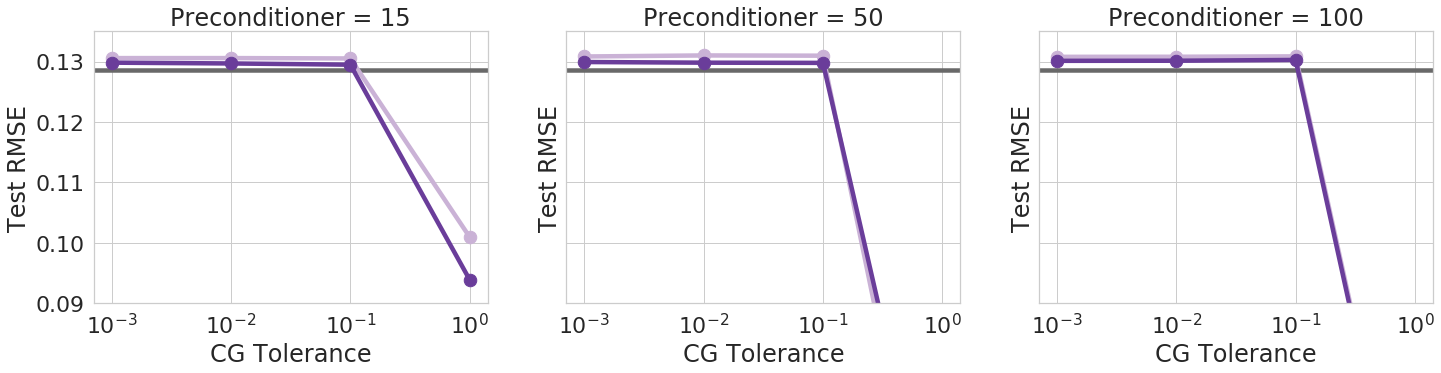

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5), sharey=True)
make_plots_by_cg_tolerance(ax[0], precond_size=15, dataset="wilson_bike")
ax[0].semilogx()
make_plots_by_cg_tolerance(ax[1], precond_size=50, dataset="wilson_bike")
ax[1].semilogx()
make_plots_by_cg_tolerance(ax[2], precond_size=100, dataset="wilson_bike")
ax[2].semilogx()

ax[0].set_title("Preconditioner = 15")
ax[1].set_title("Preconditioner = 50")
ax[2].set_title("Preconditioner = 100")

ax[0].set_ylim((0.09, 0.135))
plt.savefig("rmse_bike_precond.pdf", bbox_inches="tight")

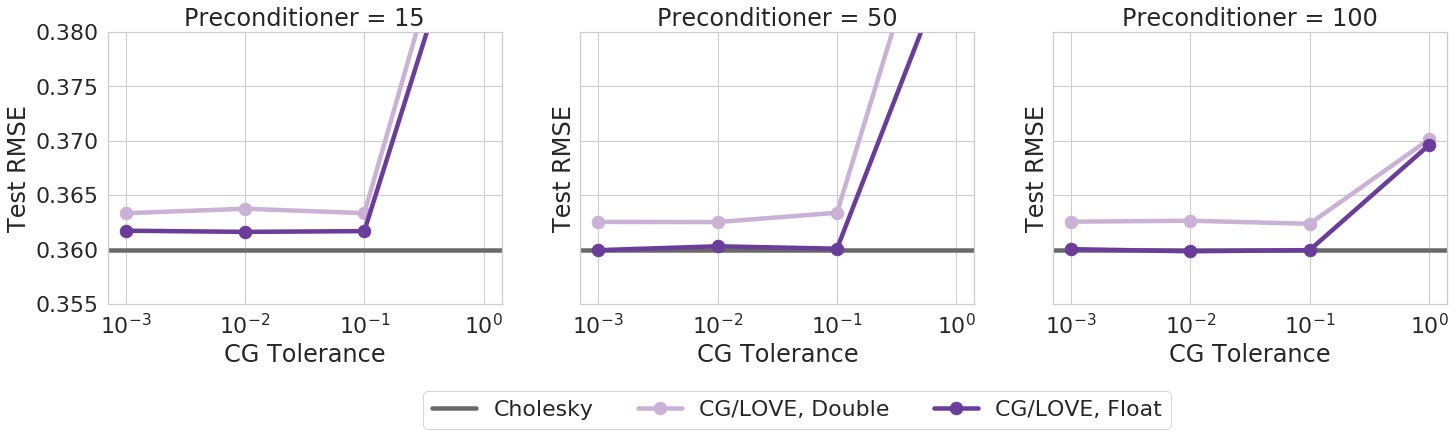

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5), sharey=True)
make_plots_by_cg_tolerance(ax[0], precond_size=15, dataset="wilson_elevators")
ax[0].semilogx()
make_plots_by_cg_tolerance(ax[1], precond_size=50, dataset="wilson_elevators")
ax[1].semilogx()
make_plots_by_cg_tolerance(ax[2], precond_size=100, dataset="wilson_elevators")
ax[2].semilogx()

ax[0].set_title("Preconditioner = 15")
ax[1].set_title("Preconditioner = 50")
ax[2].set_title("Preconditioner = 100")
ax[0].legend(ncol = 3, bbox_to_anchor = (1.75, -0.5), loc = "lower center")

ax[0].set_ylim((0.355, 0.38))
plt.savefig("rmse_elevators_precond.pdf", bbox_inches="tight")

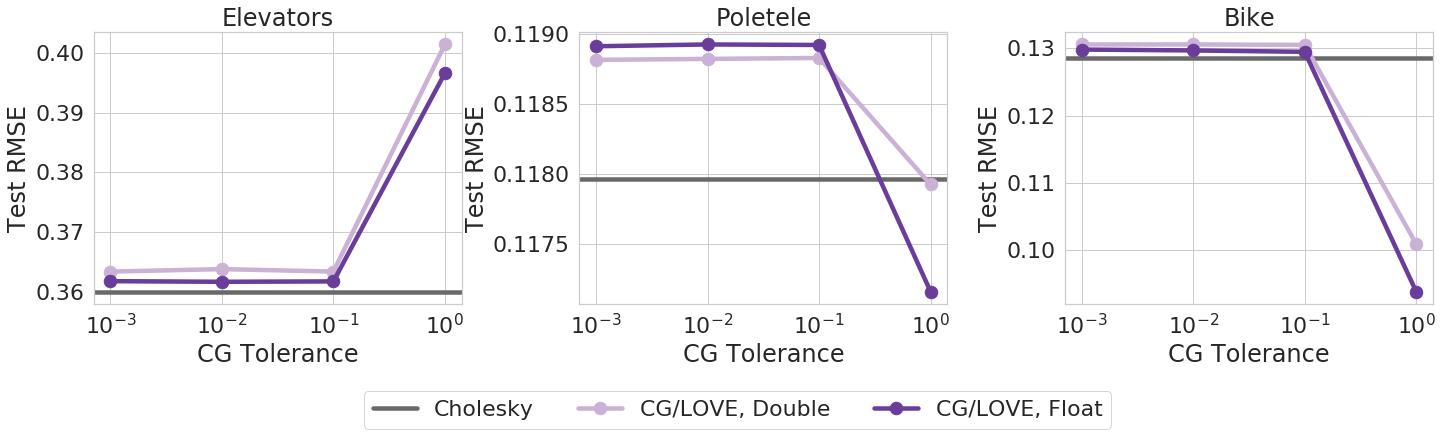

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5))
make_plots_by_cg_tolerance(ax[0], "wilson_elevators", show_legend=False)
make_plots_by_cg_tolerance(ax[1], "wilson_pol")
make_plots_by_cg_tolerance(ax[2], "wilson_bike")
ax[0].semilogx()
ax[1].semilogx()
ax[2].semilogx()


ax[0].set_title("Elevators")
ax[1].set_title("Poletele")
ax[2].set_title("Bike")
plt.subplots_adjust(wspace=0.32)

# fig.suptitle("GPyTorch Defaults: CG Tol = 1.0, Preconditioner = 15", y=1.1)
ax[0].legend(ncol = 3, bbox_to_anchor = (1.75, -0.5), loc = "lower center")
# make_plots_by_root_decomp_size(ax[3], "wilson_protein")
#plt.tight_layout()
plt.savefig("rmse_defaults.pdf", bbox_inches="tight")